<a href="https://colab.research.google.com/github/dphi-official/Machine_Learning_Bootcamp/blob/master/Explainable_A.I_Essentials/Model_Interpretation_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dependencies

In [ ]:
import numpy as np
import pandas as pd
from statistics import mean 

import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

# Data generation

In [ ]:
from sklearn.datasets import load_boston
res = load_boston(return_X_y=False)

X = res.data
y = res.target
X.shape, y.shape

((506, 13), (506,))

In [ ]:
features = res.feature_names

X = pd.DataFrame(X, columns=features)
y = pd.DataFrame({'Price': y})

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((404, 13), (102, 13))

# Train Regression Model

In [ ]:
from xgboost import XGBRegressor


xgb = XGBRegressor()
xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)
print(r2_score(y_test, pred_xgb))
print(mean_squared_error(y_test, pred_xgb))

[14:12:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9009088645475026
7.2667278403836315


# Interpretation with SHAP

In [ ]:
!pip install shap

     |████████████████████████████████| 327kB 9.7MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463903 sha256=65dd8dd28c29830f78255eaa2cf2c588ad41596ef26ca9666ecc2e566263340c
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(xgb, X_train)
shap_values = explainer.shap_values(X_test)

In [ ]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.048805,-0.011717,0.091285,-0.039607,0.218720,-1.365308,-0.510795,0.162605,0.097346,-0.107446,0.776485,0.085994,1.767896
1,-1.000341,0.063551,0.022590,0.509079,0.209319,0.927408,1.002947,-0.983981,-0.103564,0.020789,0.346951,0.112572,8.008764
2,0.530436,-0.008502,-0.044737,-0.039607,0.430372,-2.044132,-0.449253,-0.077061,-0.189598,-0.119227,-0.820961,0.085705,-3.217925


In [ ]:
X_test.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07


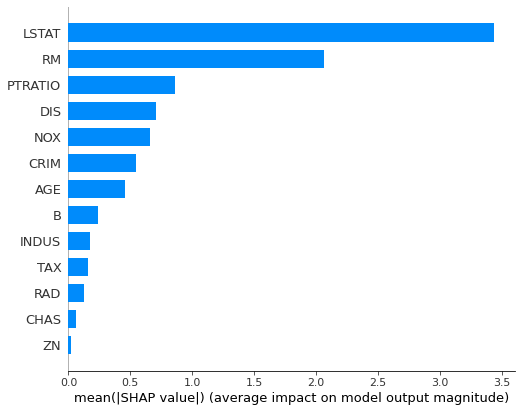

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [ ]:
y_test.iloc[10].values, pred_xgb[10]

(array([21.5]), 20.37035)

In [ ]:
explainer.expected_value

22.575143902212

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10, :], X_test.iloc[10, :])

In [ ]:
y_test.iloc[1].values, pred_xgb[1]

(array([32.4]), 31.71124)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

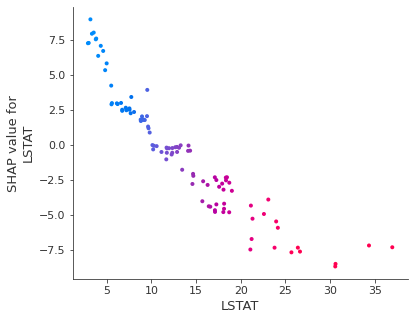

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='LSTAT',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

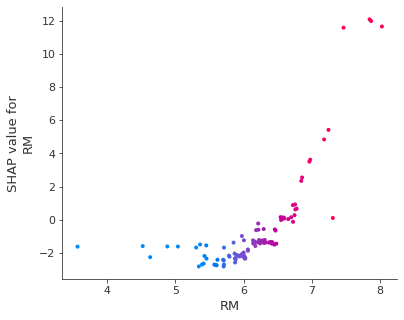

In [ ]:
shap.dependence_plot(ind='RM', interaction_index='RM',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

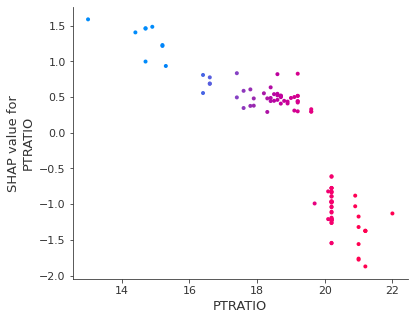

In [ ]:
shap.dependence_plot(ind='PTRATIO', interaction_index='PTRATIO',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

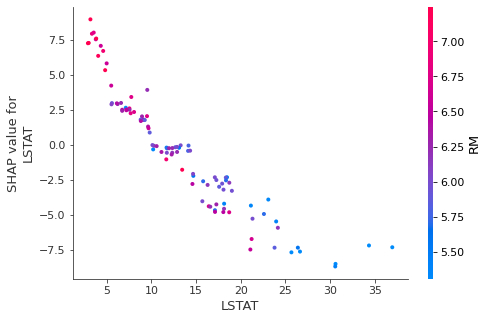

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='RM',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

# Classification

In [ ]:
y['Price'] = (y['Price'] > 30).astype(int)
y['Price'].head()

0    0
1    0
2    1
3    1
4    1
Name: Price, dtype: int64

In [ ]:
y['Price'].value_counts()

0    422
1     84
Name: Price, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


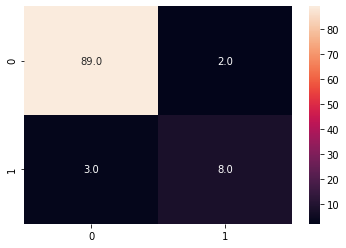

In [ ]:
cf = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cf, annot=True, fmt='.1f')

In [ ]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.80      0.73      0.76        11

    accuracy                           0.95       102
   macro avg       0.88      0.85      0.87       102
weighted avg       0.95      0.95      0.95       102



# Interpretation with SHAP

In [ ]:
explainer = shap.TreeExplainer(xgb, X_train)
shap_values = explainer.shap_values(X_test)

In [ ]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.200479,-0.027695,-0.046844,0.0,-0.158453,-0.979067,-0.101633,0.629950,-0.260286,-0.213334,0.432079,0.141578,1.572505
1,-0.589062,0.178436,-0.008575,0.0,0.092803,2.681216,-0.042126,-0.418057,-0.146931,0.414307,0.830527,0.275678,3.426286
2,0.077599,-0.040136,-0.227176,0.0,-0.058165,-0.664134,0.091376,0.362092,-0.245911,-0.136756,-0.354594,-0.041364,-1.322945


In [ ]:
X_test.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07


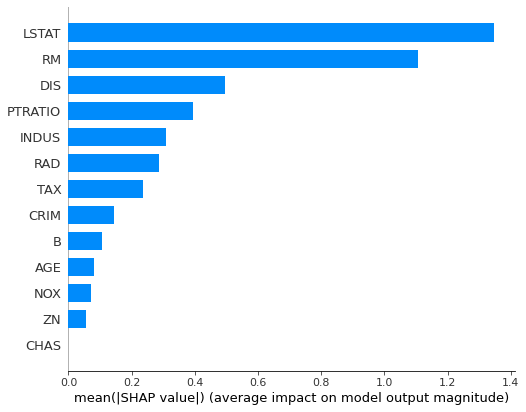

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [ ]:
y_test.iloc[10].values, pred_xgb[10]

(array([0]), 0)

In [ ]:
explainer.expected_value

-4.387520443726717

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10, :], X_test.iloc[10, :])

In [ ]:
y_test.iloc[1].values, pred_xgb[1]

(array([1]), 1)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

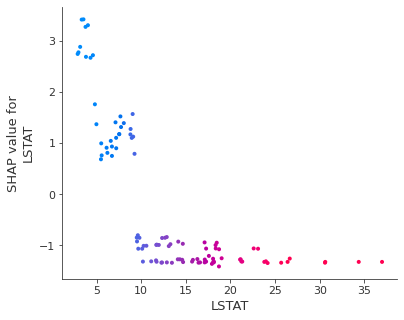

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='LSTAT',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

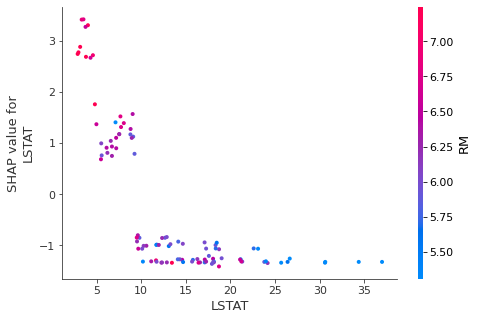

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='RM',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

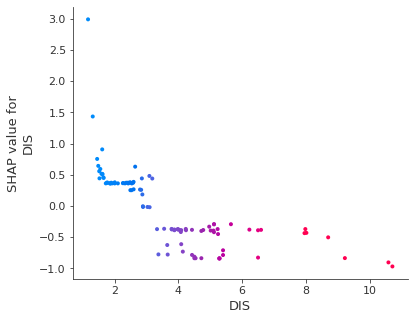

In [ ]:
shap.dependence_plot(ind='DIS', interaction_index='DIS',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)